In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [204]:
data = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')
data.drop('Unnamed: 0',axis=1,inplace=True)

#### `Drop useless columns`

In [205]:
data.drop(['ID','CollegeTier','CollegeCityTier','CollegeCityID','DOB'],axis=1,inplace=True)

#### `Today Date for finding experience`

In [206]:
import datetime as dt
data["DOL"].replace("present",dt.date.today(),inplace=True)
data['DOL'] = data['DOL'].astype('datetime64')

In [207]:
data.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64
ComputerScience                   int64
MechanicalEngg                    int64


In [208]:
data.shape

(3998, 33)

In [209]:
data.replace([-1,0],np.NaN,inplace=True)

#### `Null value distribution among columns`

In [210]:
(data.isnull().sum()/data.shape[0])*100

Salary                    0.000000
DOJ                       0.000000
DOL                       0.000000
Designation               0.000000
JobCity                  11.530765
Gender                    0.000000
10percentage              0.000000
10board                   8.754377
12graduation              0.000000
12percentage              0.000000
12board                   8.979490
CollegeID                 0.000000
Degree                    0.000000
Specialization            0.000000
collegeGPA                0.000000
CollegeState              0.000000
GraduationYear            0.025013
English                   0.000000
Logical                   0.000000
Quant                     0.000000
Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemicon    71.385693
ComputerScience          77.438719
MechanicalEngg           94.122061
ElectricalEngg           95.972986
TelecomEngg              90.645323
CivilEngg                98.949475
conscientiousness   

#### `Dropping columns that have so much missing values`

In [211]:
data.drop(['ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg','CollegeID','12graduation'],axis=1,inplace=True)

In [212]:
data.dropna(inplace=True)

In [213]:
data = data[data['collegeGPA']>40]

In [214]:
data.dtypes

Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
10percentage                    float64
10board                          object
12percentage                    float64
12board                          object
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeState                     object
GraduationYear                  float64
English                         float64
Logical                         float64
Quant                           float64
Domain                          float64
ComputerProgramming             float64
conscientiousness               float64
agreeableness                   float64
extraversion                    float64
nueroticism                     float64
openess_to_experience           float64


In [215]:
cont_columns = data.select_dtypes(['int64','float64']).columns.to_list()
cat_columns =  data.select_dtypes(['object']).columns.to_list()

In [216]:
cont_columns

['Salary',
 '10percentage',
 '12percentage',
 'collegeGPA',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [217]:
cat_columns

['Designation',
 'JobCity',
 'Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState']

### `Univariate Analysis`
### `Numerical Columns`

#### `Salary`

<AxesSubplot:xlabel='Salary', ylabel='Density'>

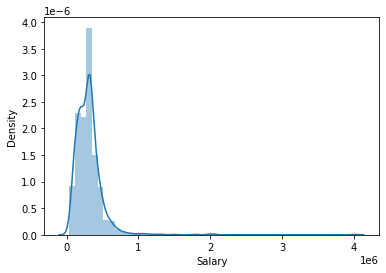

In [218]:
sns.distplot(data[cont_columns[0]])

<AxesSubplot:xlabel='Salary'>

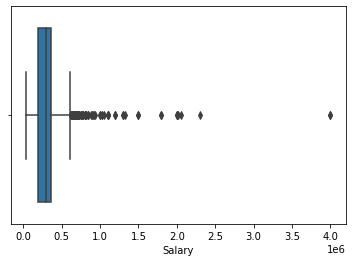

In [219]:
sns.boxplot(data[cont_columns[0]])

#### `10percentage`

<AxesSubplot:xlabel='10percentage', ylabel='Density'>

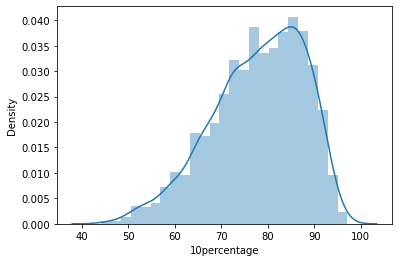

In [220]:
sns.distplot(data[cont_columns[1]])

<AxesSubplot:xlabel='10percentage'>

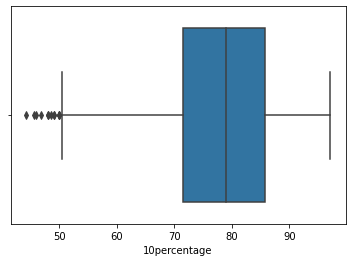

In [221]:
sns.boxplot(data[cont_columns[1]])

#### `12percentage`

<AxesSubplot:xlabel='collegeGPA', ylabel='Density'>

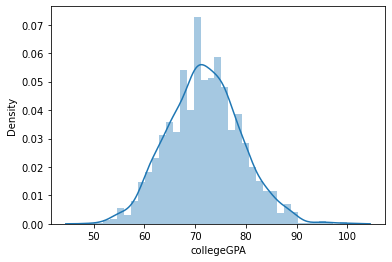

In [222]:
sns.distplot(data[cont_columns[3]])

<AxesSubplot:xlabel='collegeGPA'>

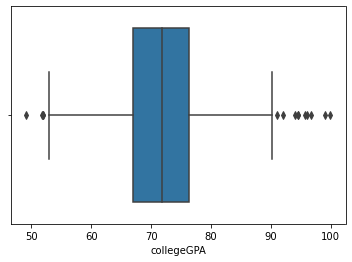

In [223]:
sns.boxplot(data[cont_columns[3]])

#### `collegeGPA`

<AxesSubplot:xlabel='GraduationYear', ylabel='Density'>

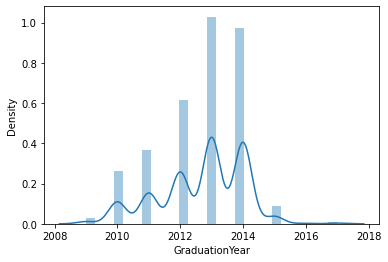

In [224]:
sns.distplot(data[cont_columns[4]])

<AxesSubplot:xlabel='GraduationYear'>

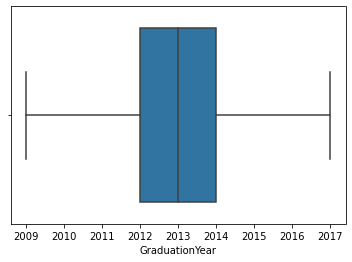

In [225]:
sns.boxplot(data[cont_columns[4]])

#### `English`

In [226]:
cont_columns.remove('GraduationYear')

<AxesSubplot:xlabel='Logical', ylabel='Density'>

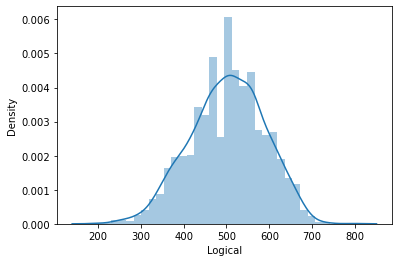

In [227]:
sns.distplot(data[cont_columns[5]])

<AxesSubplot:xlabel='Logical'>

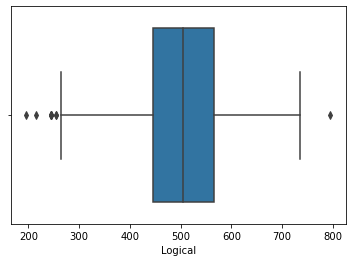

In [228]:
sns.boxplot(data[cont_columns[5]])

#### `Logical`

<AxesSubplot:xlabel='Quant', ylabel='Density'>

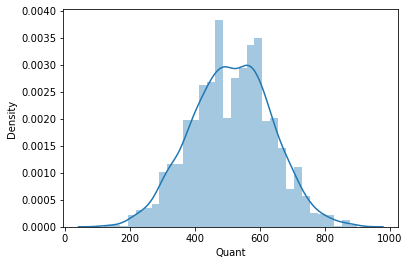

In [229]:
sns.distplot(data[cont_columns[6]])

<AxesSubplot:xlabel='Quant'>

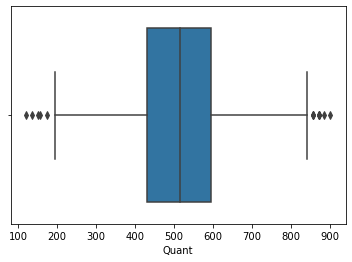

In [230]:
sns.boxplot(data[cont_columns[6]])

#### `Quant`

<AxesSubplot:xlabel='Domain', ylabel='Density'>

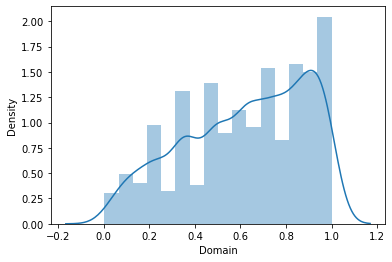

In [231]:
sns.distplot(data[cont_columns[7]])

<AxesSubplot:xlabel='Domain'>

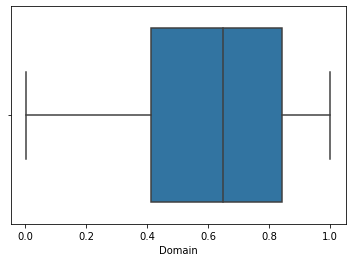

In [232]:
sns.boxplot(data[cont_columns[7]])

#### `ComputerProgramming`

<AxesSubplot:xlabel='conscientiousness', ylabel='Density'>

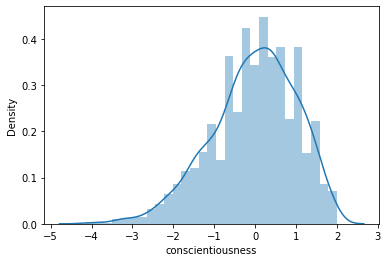

In [233]:
sns.distplot(data[cont_columns[9]])

<AxesSubplot:xlabel='conscientiousness'>

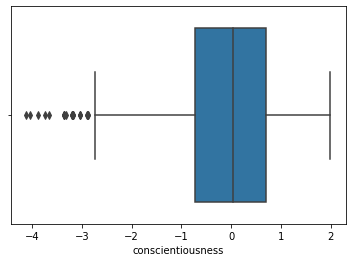

In [234]:
sns.boxplot(data[cont_columns[9]])

### `Categorical Columns`

<AxesSubplot:>

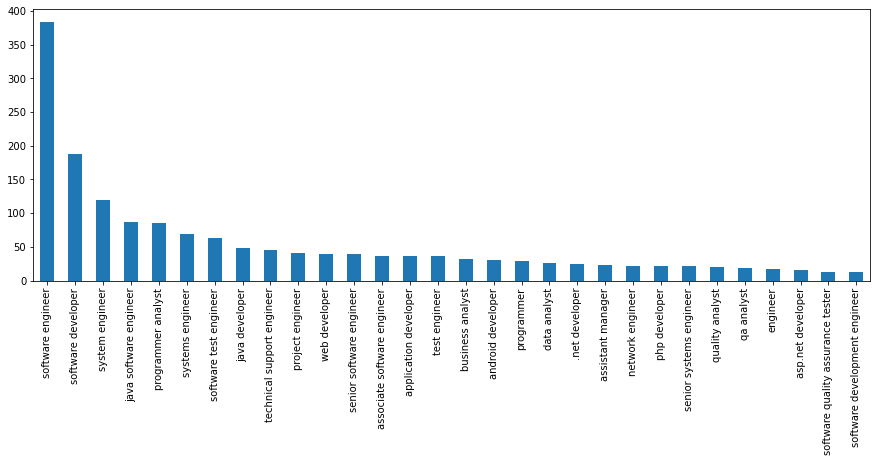

In [235]:
freq = data['Designation'].value_counts()[:30]
freq.plot(kind='bar', figsize=(15,5))

In [236]:
data = data[data['Designation'] != 'get']

<AxesSubplot:>

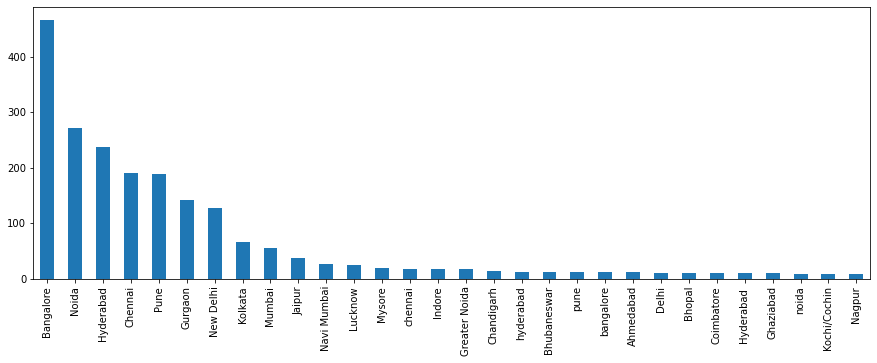

In [237]:
freq = data['JobCity'].value_counts()[:30]
freq.plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

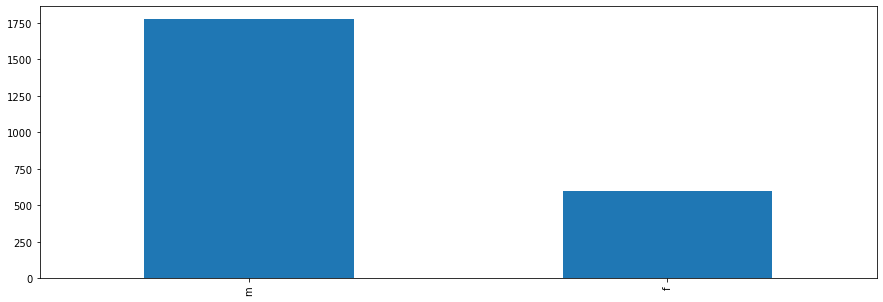

In [238]:
freq = data['Gender'].value_counts()
freq.plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

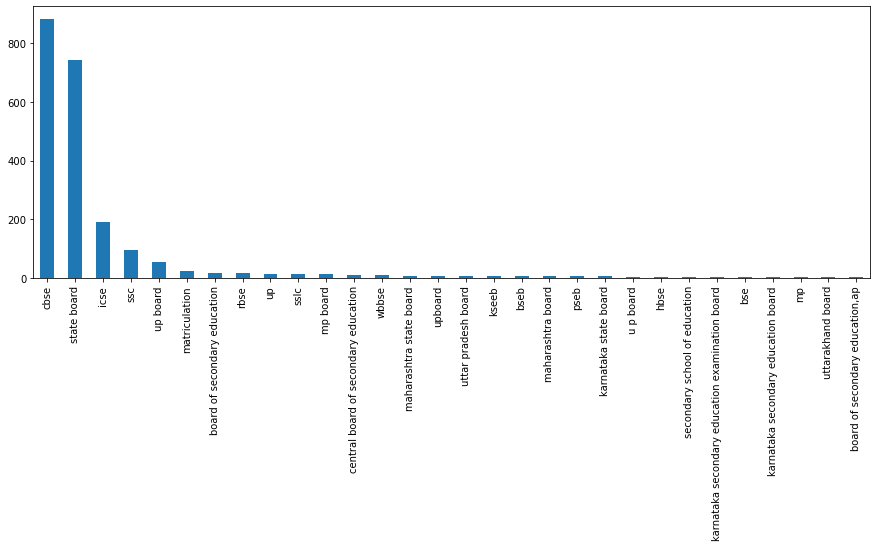

In [239]:
freq = data['10board'].value_counts()[:30]
freq.plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

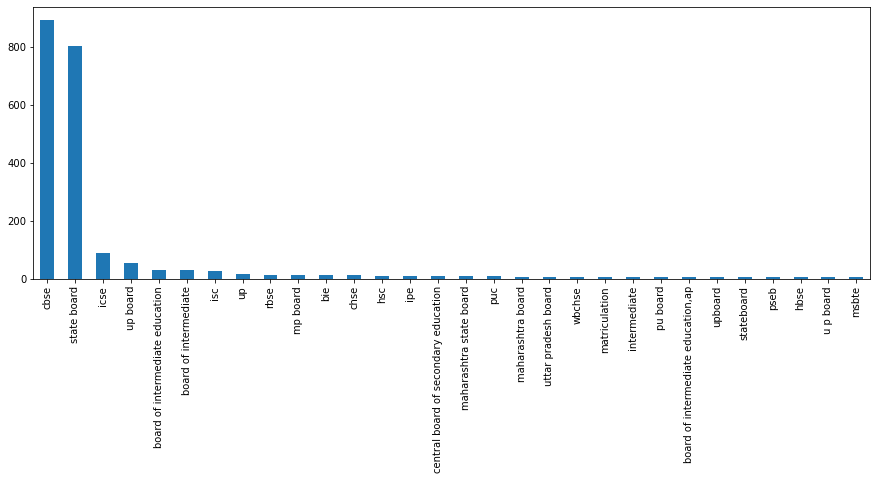

In [240]:
freq = data['12board'].value_counts()[:30]
freq.plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

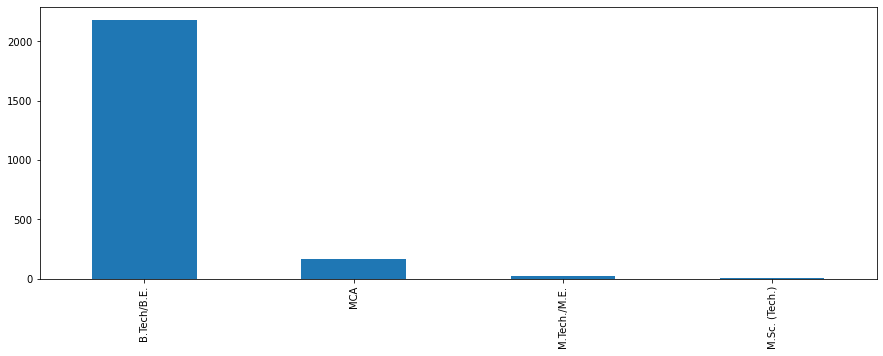

In [241]:
freq = data['Degree'].value_counts()
freq.plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

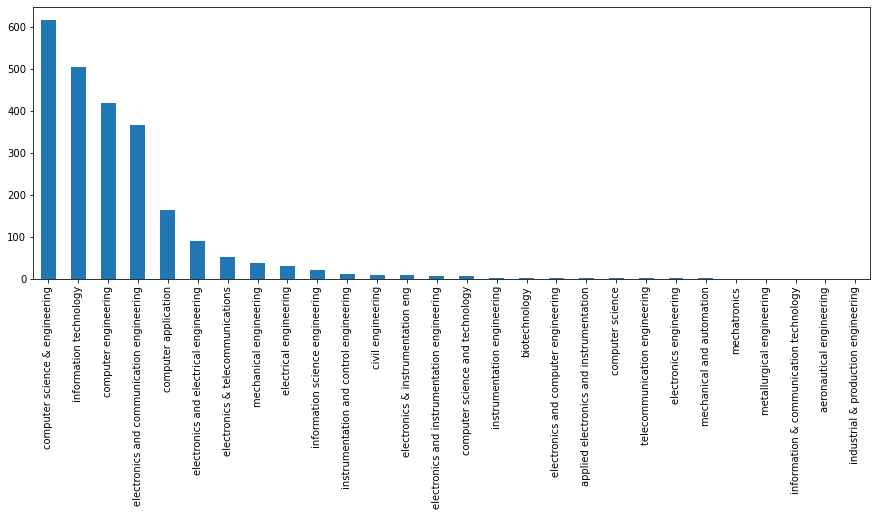

In [242]:
freq = data['Specialization'].value_counts()
freq.plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

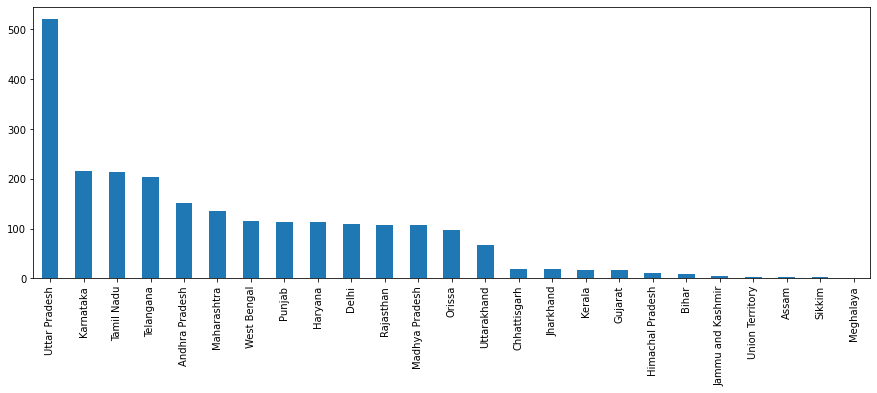

In [243]:
freq = data['CollegeState'].value_counts()
freq.plot(kind='bar', figsize=(15,5))

### `Bivariate Analysis`

In [244]:
data['Experience'] = data['DOL'] - data['DOJ']  # experience

#### `Top 10 Salaried Professional`

In [245]:
data.sort_values(by='Salary',ascending=False)[:10]

,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,...,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
2182,4000000.0,2010-01-01,2011-12-01,automation engineer,gurgaon,m,53.00,up bord,61.00,up bord,...,455.0,475.0,0.525923,415.0,-3.3539,-0.4353,-1.0697,-0.05520,-2.6572,699 days
1237,4000000.0,2010-07-01,2015-03-01,senior software engineer,New Delhi,m,90.83,rbse,88.77,rbse,...,685.0,585.0,0.990009,655.0,-0.7264,0.0328,-1.6502,-0.87780,-0.1295,1704 days
2030,2300000.0,2014-03-01,2021-11-16,software developer,"Kalmar, Sweden",m,84.67,andhra pradesh state board,77.10,andhra pradesh state board,...,675.0,655.0,0.910770,405.0,-1.0355,1.7488,1.2525,0.53230,1.1343,2817 days
1517,2050000.0,2015-04-01,2021-11-16,software engineer trainee,Noida,m,64.28,icse,60.00,icse,...,425.0,335.0,0.486747,185.0,-0.1082,0.5008,1.3977,1.70743,0.1864,2421 days
1239,2020000.0,2014-06-01,2015-04-01,operations analyst,Bangalore,m,72.00,state board,70.00,state board,...,400.0,235.0,0.216785,325.0,-0.5899,-0.9531,-0.7585,-0.74150,-1.8189,304 days
3490,2000000.0,2013-07-01,2014-10-01,technical lead,Pune,m,69.50,state board,68.50,state board,...,500.0,235.0,0.413838,385.0,0.5591,1.0449,1.2396,0.39950,1.0554,457 days
2541,2000000.0,2015-06-01,2021-11-16,data scientist,LONDON,m,90.00,cbse,89.40,cbse,...,555.0,585.0,0.842248,505.0,1.4208,1.7109,0.1637,-1.88240,-0.4776,2360 days
3484,2000000.0,2013-09-01,2014-06-01,it technician,Noida,m,59.00,state board,65.00,state board,...,520.0,370.0,0.276047,345.0,1.5644,0.8784,0.4711,-0.99500,0.0973,273 days
2565,1800000.0,2015-01-01,2015-04-01,salesforce developer,Panchkula,f,81.30,cbse,77.00,cbse,...,425.0,270.0,0.744758,415.0,-0.1590,1.0449,0.4711,-0.86820,0.6721,90 days
2216,1800000.0,2012-12-01,2015-02-01,client services associate,Bangalore,f,84.00,secondary school of education,71.00,board of intermediate education,...,485.0,345.0,0.376060,215.0,-2.1175,-1.5273,0.5269,-0.52530,-1.0774,792 days


In [246]:
data.sort_values(by='10percentage',ascending=False)[:10]

,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,...,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
1004,510000.0,2012-01-01,2015-04-01,systems engineer,Bangalore,f,97.12,karnataka secondary education examination board,90.33,department of pre-university education(governm...,...,555.0,555.0,0.864685,525.0,0.9737,0.3448,0.6720,-0.5253,0.3444,1186 days
2784,200000.0,2014-12-01,2021-11-16,system engineer,Chennai,m,97.00,state board,95.08,state board,...,395.0,545.0,0.493596,355.0,1.4208,0.7119,-0.7585,-1.6289,-0.8608,2542 days
3859,300000.0,2014-09-01,2015-04-01,system engineer,Chennai,f,96.80,cbse,92.30,cbse,...,570.0,605.0,0.943272,425.0,0.1282,0.7119,0.4711,-0.9950,1.0554,212 days
326,550000.0,2013-10-01,2021-11-16,senior software engineer,Bangalore,f,96.48,state board,82.00,state board,...,525.0,575.0,0.819417,505.0,0.4155,-0.6201,-1.0659,-2.6430,-1.4356,2968 days
964,300000.0,2013-06-01,2015-04-01,project engineer,Bangalore,f,96.00,"stjosephs girls higher sec school,dindigul",92.00,"srv girls higher sec school,rasipuram",...,475.0,565.0,0.694479,265.0,-1.3447,-0.7473,-1.5051,1.1199,-1.3539,669 days
2038,325000.0,2014-06-01,2021-11-16,systems engineer,Hyderabad,m,96.00,icse,79.50,state board,...,670.0,720.0,0.842248,575.0,-0.4463,1.2114,0.9322,1.1601,-0.0943,2725 days
780,325000.0,2014-10-01,2021-11-16,system engineer,Bangalore,m,96.00,icse,87.00,cbse,...,565.0,655.0,0.974396,615.0,-0.4463,1.2114,0.6248,0.2727,0.6721,2603 days
2558,600000.0,2014-09-01,2021-11-16,business analyst,Bangalore,f,95.60,cbse,81.60,cbse,...,655.0,795.0,0.793581,495.0,-0.1590,1.2114,1.5470,-0.7415,-0.4776,2633 days
2419,345000.0,2014-07-01,2015-01-01,design engineer,Pune,m,95.54,state board,90.00,state board,...,610.0,530.0,0.255778,355.0,-1.0208,-0.6201,0.6248,1.1601,-0.2859,184 days
3179,500000.0,2012-01-01,2021-11-16,system engineer,New Delhi,f,95.40,cbse,93.20,cbse,...,625.0,615.0,0.983750,635.0,-0.7264,0.6568,0.0914,-0.2902,0.3444,3607 days


In [247]:
data.sort_values(by='12percentage',ascending=False)[:10]

,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,...,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
2767,570000.0,2013-08-01,2015-04-01,assistant manager,Mumbai,m,93.16,state board,97.9,state board,...,585.0,750.0,0.993917,295.0,1.5644,0.2124,-0.2974,-2.51630,-0.8608,608 days
899,320000.0,2014-09-01,2021-11-16,java software engineer,Bangalore,m,89.10,state board,97.8,state board,...,595.0,870.0,0.960603,475.0,-0.4463,-0.2871,-1.2196,1.03330,0.0973,2633 days
2831,375000.0,2013-02-01,2021-11-16,system engineer,Pune,f,89.00,state,97.6,state,...,495.0,525.0,0.735796,475.0,0.1623,0.8128,0.2366,-0.08460,-0.7615,3210 days
1403,500000.0,2012-03-01,2014-07-01,senior systems engineer,Hyderabad,m,91.00,cbse,97.5,bieap,...,595.0,665.0,0.979522,625.0,0.5100,0.3448,0.3817,-1.46530,-0.2875,852 days
1199,380000.0,2014-07-01,2021-11-16,associate software engineer,Hyderabad,m,94.80,state board,97.4,state board,...,450.0,545.0,0.338786,335.0,1.1336,0.3789,0.9322,-2.13600,-0.6692,2695 days
1456,425000.0,2013-06-01,2021-11-16,senior software developer,Bangalore,m,85.30,ssc,97.4,bie,...,405.0,705.0,0.229482,405.0,0.2009,0.9688,-1.9405,1.35490,-0.1690,3090 days
3501,435000.0,2012-03-01,2021-11-16,systems engineer,Hyderabad,m,88.00,ssc,97.2,ipe,...,495.0,575.0,0.983750,635.0,-0.7264,1.1248,0.3817,-1.11280,0.5024,3547 days
509,450000.0,2011-12-01,2021-11-16,systems engineer,Hyderabad,f,90.00,state board of secondary education( ssc),97.1,board of intermediate education,...,555.0,655.0,0.916870,555.0,-1.3447,1.4368,-0.4891,-0.64280,0.6603,3638 days
950,405000.0,2012-10-01,2021-11-16,system engineer,Hyderabad,m,93.00,"state board of secondary education,andhra pradesh",97.0,"board of intermediate education,andhra pradesh",...,655.0,565.0,0.942117,575.0,-0.5719,-0.3183,-0.9245,0.64983,-1.5513,3333 days
1603,400000.0,2013-03-01,2015-04-01,software quality assurance tester,Hyderabad,f,90.00,board of secondary education,97.0,"board of intermediate education,ap",...,595.0,625.0,0.916870,555.0,1.6692,1.5928,0.9623,-1.05410,0.6603,761 days


In [248]:
data.sort_values(by='collegeGPA',ascending=False)[:10]

,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,...,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
690,440000.0,2013-10-01,2015-04-01,software developer,Gurgaon,f,83.16,icse,77.00,cbse,...,595.0,620.0,0.376060,455.0,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,547 days
3850,370000.0,2012-07-01,2021-11-16,software developer,Navi Mumbai,f,81.20,ssc,76.30,hsc,...,385.0,485.0,0.600057,435.0,-0.1082,0.5008,-0.1626,1.11990,-0.9194,3425 days
1510,560000.0,2014-08-01,2021-11-16,software engineer,Bangalore,f,90.00,"board of secondary education,ap",93.00,"board of intermediate education:ap,hyderabad",...,595.0,595.0,0.704090,465.0,-0.0696,0.6568,-0.6343,-0.26090,-1.0774,2664 days
1134,350000.0,2010-04-01,2012-08-01,software engineer,Noida,f,77.00,icse,76.00,cbse,...,505.0,575.0,0.824666,395.0,1.5920,0.9688,0.9623,-0.52530,0.9763,853 days
3276,1100000.0,2010-06-01,2021-11-16,design engineer,Greater Noida,m,83.69,pseb,76.67,pseb,...,615.0,725.0,0.694479,615.0,-1.4992,0.3448,-0.0537,-0.76030,0.5024,4186 days
2988,500000.0,2013-07-01,2021-11-16,business analyst,Gurgaon,m,95.20,cbse,91.40,cbse,...,560.0,885.0,0.824666,445.0,0.1282,0.2124,0.1637,-0.48790,0.4805,3060 days
874,400000.0,2013-02-01,2015-04-01,programmer analyst,Chennai,m,83.82,tamilnadu matriculation board,92.67,tamilnadu higher secondary education board,...,595.0,425.0,0.942117,575.0,0.5100,0.9688,0.8171,-1.23027,-0.1295,789 days
2703,500000.0,2014-08-01,2021-11-16,software engineer,Chennai,m,94.00,state board,89.70,state board,...,615.0,775.0,0.974396,615.0,0.5591,0.5454,-0.6048,0.52620,0.0973,2664 days
2880,1030000.0,2013-07-01,2021-11-16,senior software developer,Bangalore,f,91.20,cbse,84.80,cbse,...,585.0,765.0,0.994051,675.0,-0.1590,0.5454,0.4711,-1.50210,-1.0524,3060 days
3108,300000.0,2014-09-01,2021-11-16,software engineer,Gurgaon,m,85.80,cbse,83.00,cbse,...,545.0,590.0,0.649390,655.0,-0.1590,0.5454,0.4711,-1.12180,-0.6692,2633 days


In [249]:
data.sort_values(by='Experience',ascending=False)[:10]

,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,...,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
2853,615000.0,1991-06-01,2021-11-16,quality assurance test engineer,Noida,f,71.00,state board,74.80,state board,...,545.0,680.0,0.952246,585.0,-1.8825,-2.7846,-0.1437,0.9066,-1.0524,11126 days
1189,350000.0,2006-01-01,2021-11-16,general manager,Jaipur,m,83.40,cbse,77.00,cbse,...,555.0,440.0,0.308401,355.0,-1.0208,-1.1196,-1.9881,-0.2344,-2.7769,5798 days
3139,490000.0,2007-07-01,2021-11-16,senior engineer,Bangalore,m,83.20,sslc,77.33,puc,...,415.0,485.0,0.376060,345.0,-0.4173,0.1888,-0.3440,-1.4653,-0.6035,5252 days
3276,1100000.0,2010-06-01,2021-11-16,design engineer,Greater Noida,m,83.69,pseb,76.67,pseb,...,615.0,725.0,0.694479,615.0,-1.4992,0.3448,-0.0537,-0.7603,0.5024,4186 days
849,730000.0,2010-06-01,2021-11-16,senior business analyst,Gurgaon,f,87.60,cbse,72.20,cbse,...,605.0,465.0,0.229482,445.0,-1.0355,-1.0593,-1.0697,0.4148,-0.4455,4186 days
2594,850000.0,2010-07-01,2021-11-16,assistant manager,Durgapur,m,89.40,icse,91.30,andhra pradesh board of secondary education,...,435.0,705.0,0.755375,465.0,0.2009,0.0328,0.2366,-0.8778,0.1864,4156 days
547,460000.0,2010-07-01,2021-11-16,senior software engineer,Pune,m,76.00,maharashtra,72.00,maharashtra,...,355.0,545.0,0.488348,405.0,-1.3447,-1.9953,-1.3599,0.1798,-2.0253,4156 days
685,530000.0,2010-07-01,2021-11-16,sr. engineer,CHEYYAR,f,77.70,matriculation,85.30,stateboard,...,435.0,554.0,0.700826,464.0,-1.3447,-1.2153,-0.6343,-0.2902,-1.0774,4156 days
3015,720000.0,2010-07-01,2021-11-16,civil engineer,patna,m,82.00,cbse,75.00,cbse,...,375.0,605.0,0.286778,495.0,0.6646,-0.1232,0.2366,-0.0552,0.6603,4156 days
1468,600000.0,2010-08-01,2021-11-16,quality assurance engineer,Chennai,m,84.00,matriculation,85.67,state board,...,615.0,415.0,0.930371,565.0,-0.2628,1.2808,0.0914,-0.9953,-0.6035,4125 days


<AxesSubplot:xlabel='Salary', ylabel='Gender'>

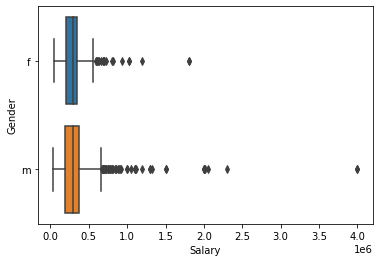

In [250]:
sns.boxplot(x=data['Salary'],y=data['Gender'])

<AxesSubplot:xlabel='Salary', ylabel='Degree'>

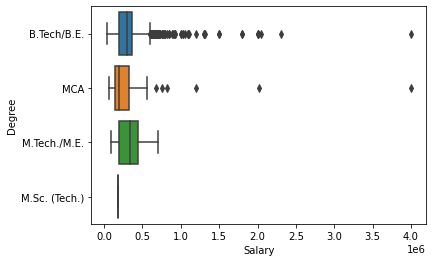

In [251]:
sns.boxplot(x=data['Salary'],y=data['Degree'])

<AxesSubplot:xlabel='Salary', ylabel='10percentage'>

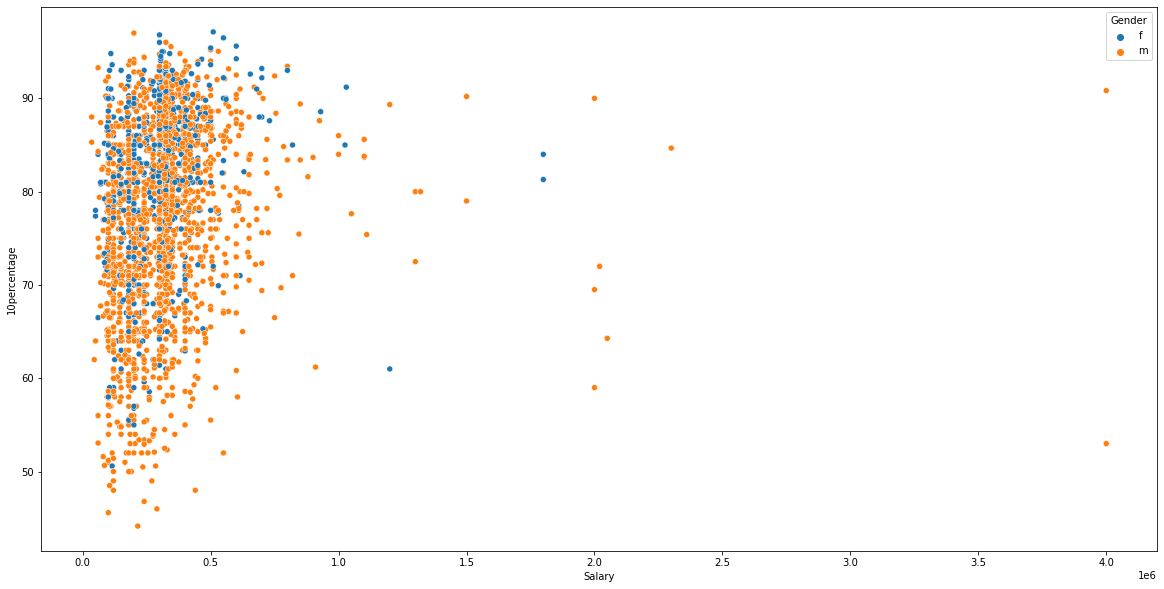

In [252]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Salary',y='10percentage',hue=data['Gender'],data=data)

<AxesSubplot:xlabel='Salary', ylabel='12percentage'>

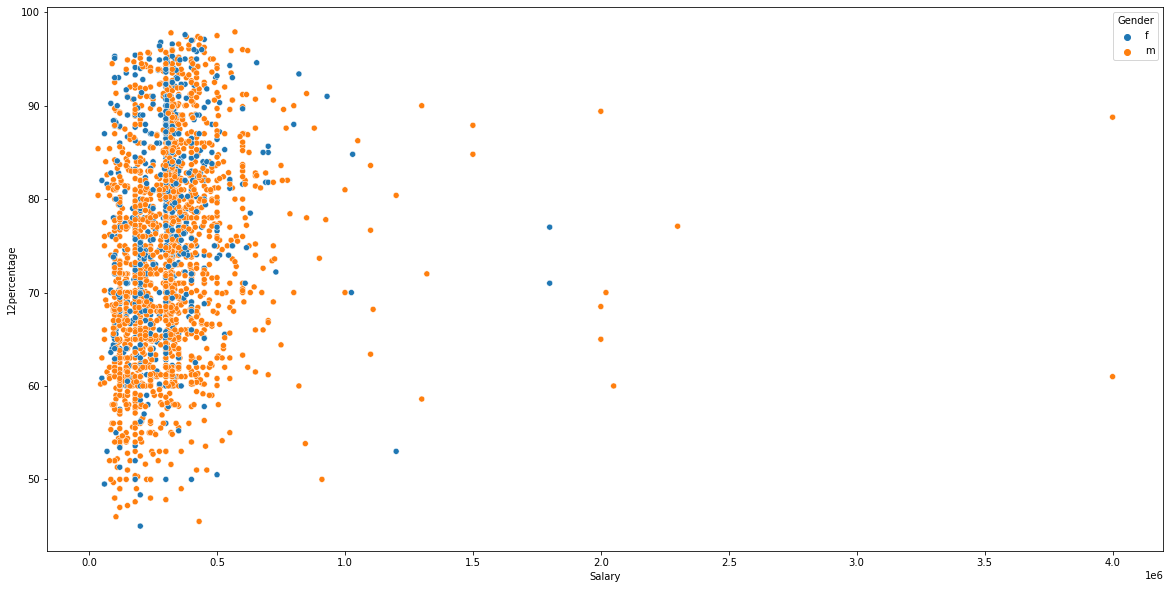

In [253]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Salary',y='12percentage',hue=data['Gender'],data=data)

<AxesSubplot:xlabel='Salary', ylabel='collegeGPA'>

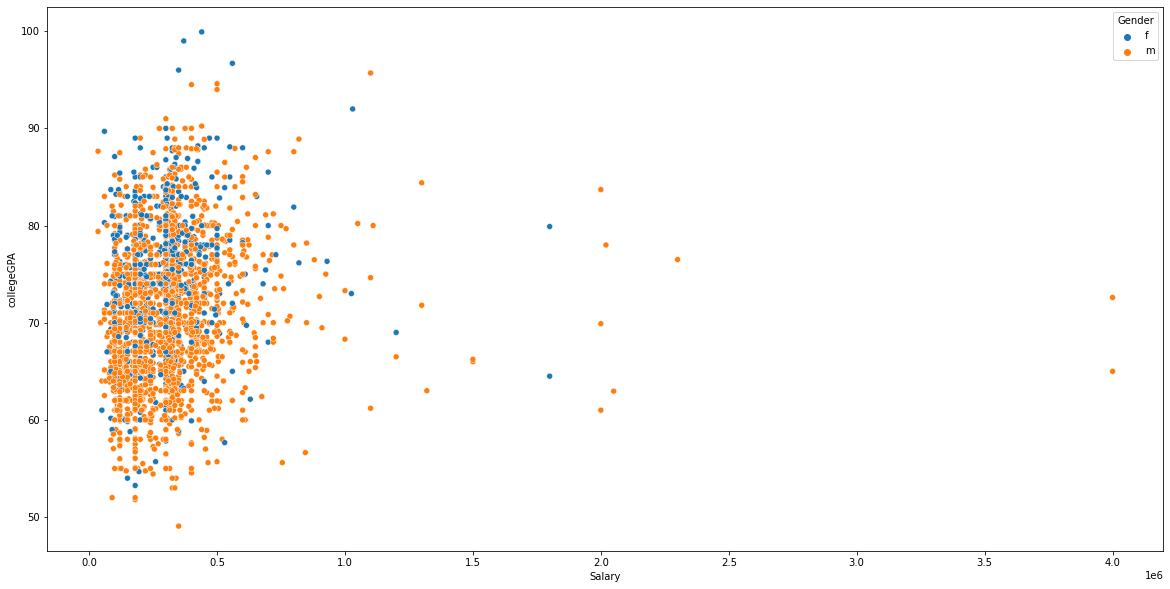

In [254]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Salary',y='collegeGPA',hue=data['Gender'],data=data)

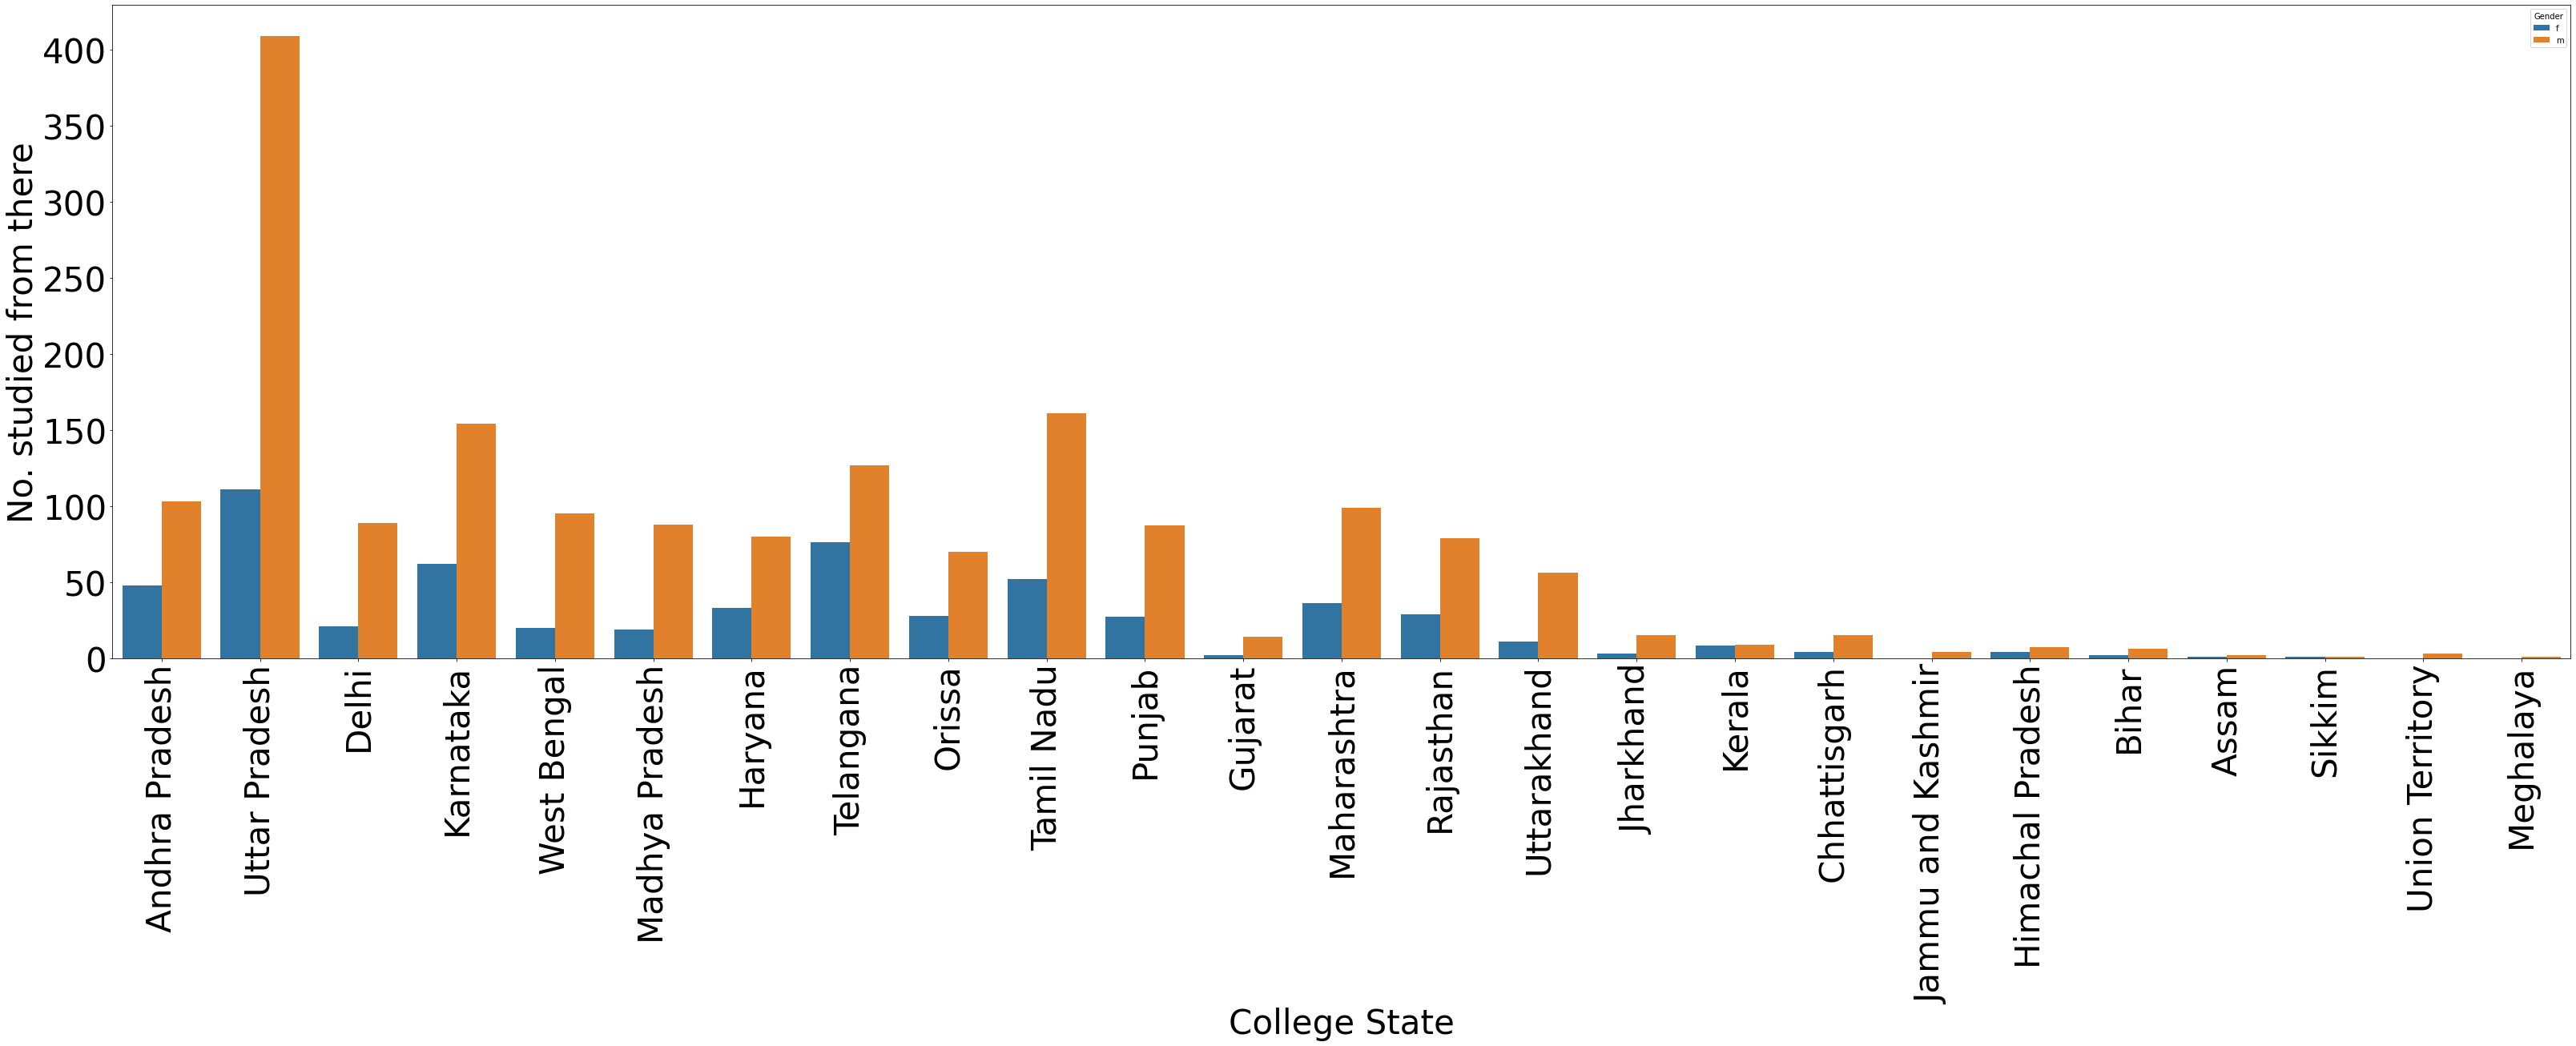

In [255]:
plt.figure(figsize=(55,15))
sns.countplot(x="CollegeState",data=data,hue="Gender")
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.xlabel('College State',fontsize=42)
plt.ylabel('No. studied from there',fontsize=42);

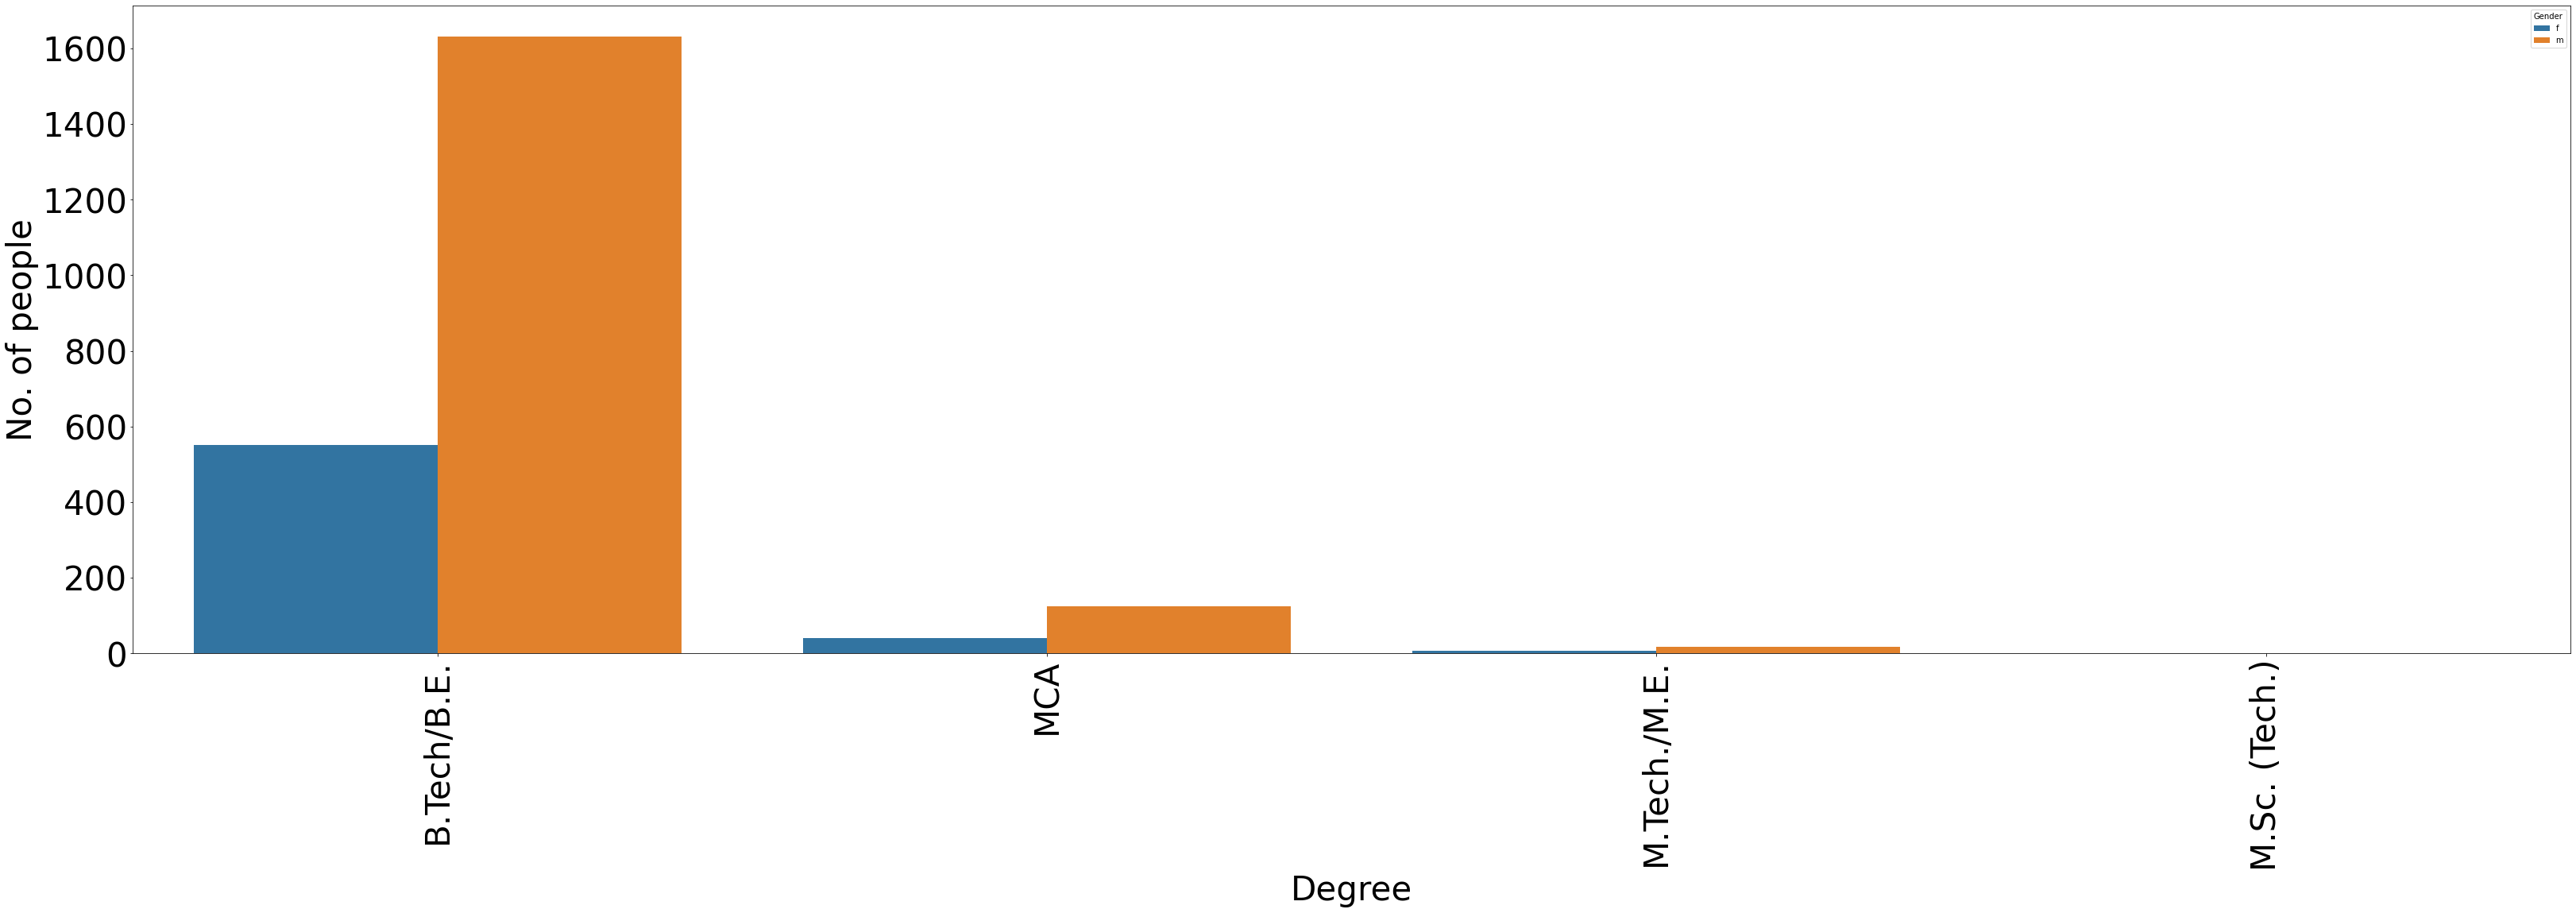

In [256]:
plt.figure(figsize=(55,15))
sns.countplot(x="Degree",data=data,hue="Gender")
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.xlabel('Degree',fontsize=42)
plt.ylabel('No. of people',fontsize=42);

In [257]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender',
       '10percentage', '10board', '12percentage', '12board', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Experience'],
      dtype='object')

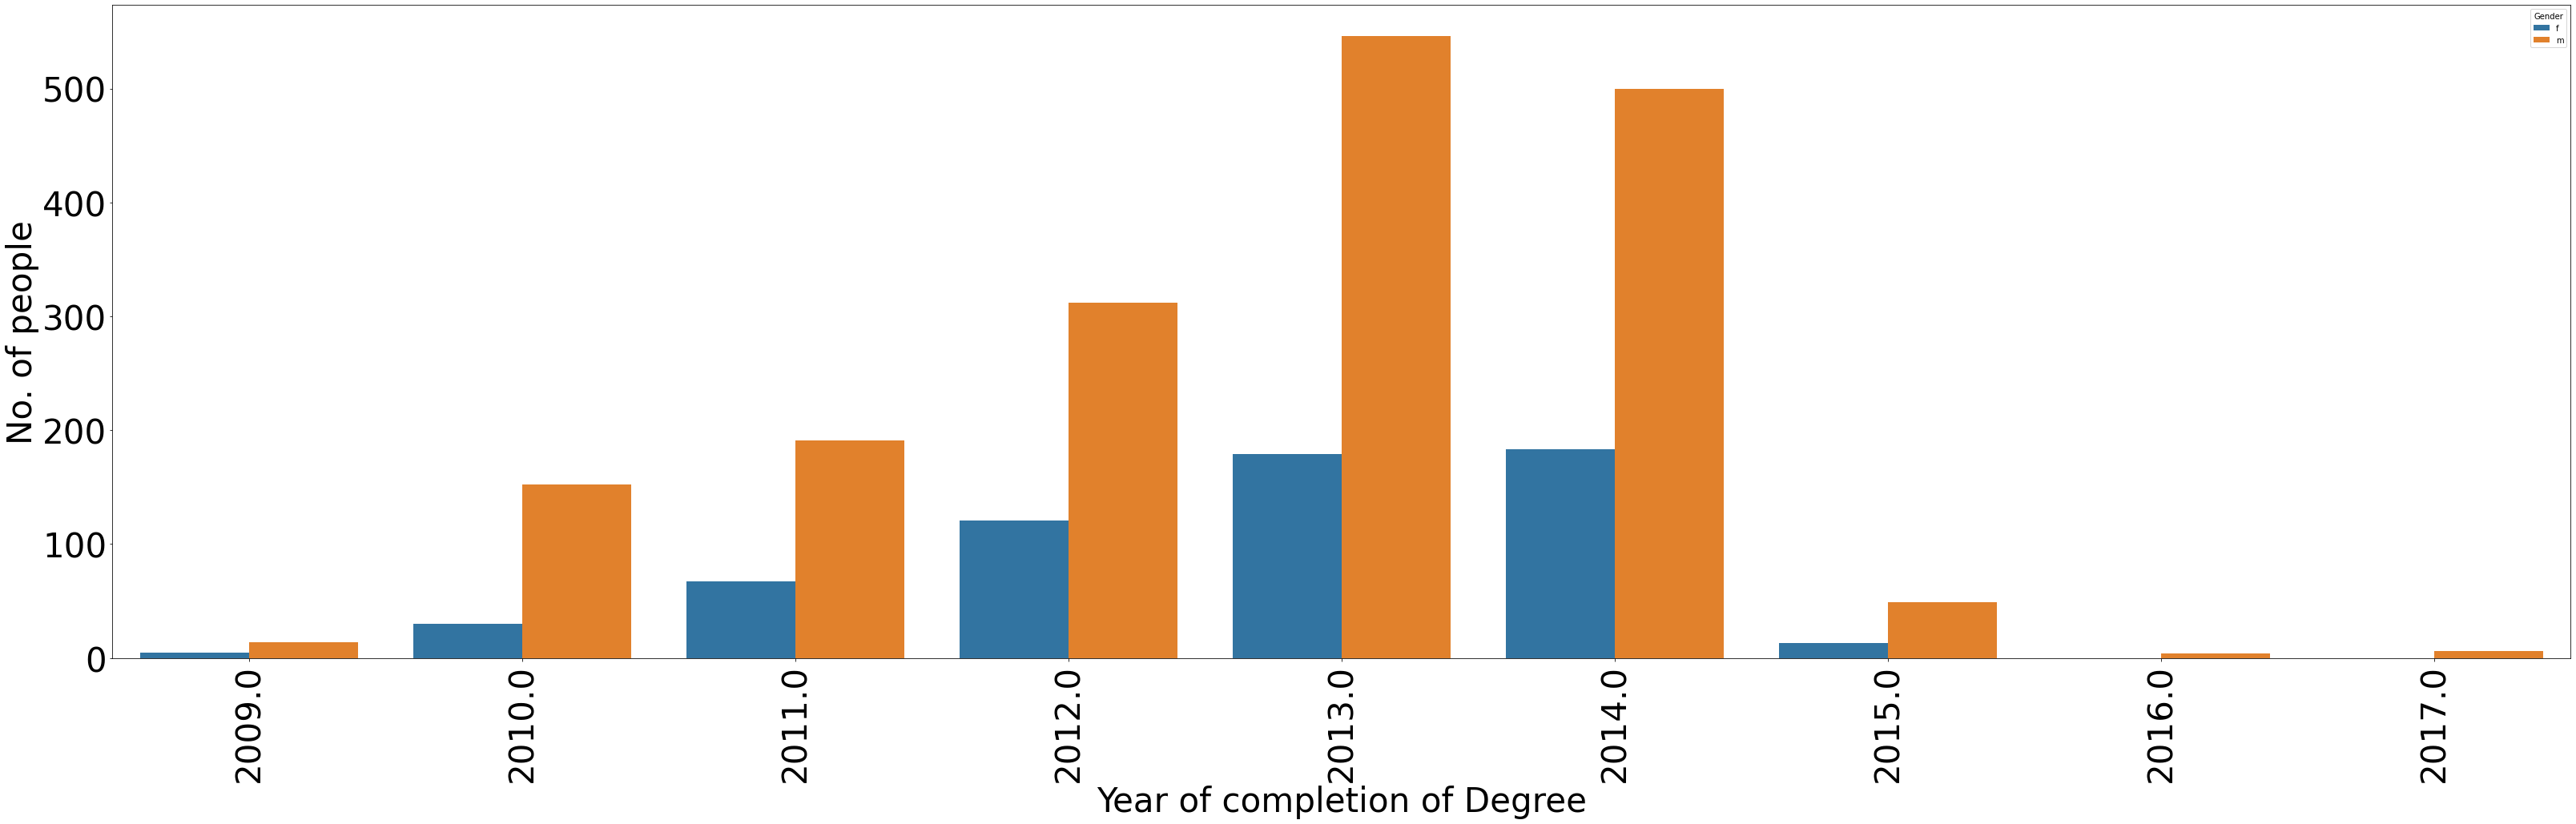

In [258]:
plt.figure(figsize=(55,15))
sns.countplot(x="GraduationYear",data=data,hue="Gender")
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.xlabel('Year of completion of Degree',fontsize=42)
plt.ylabel('No. of people',fontsize=42);

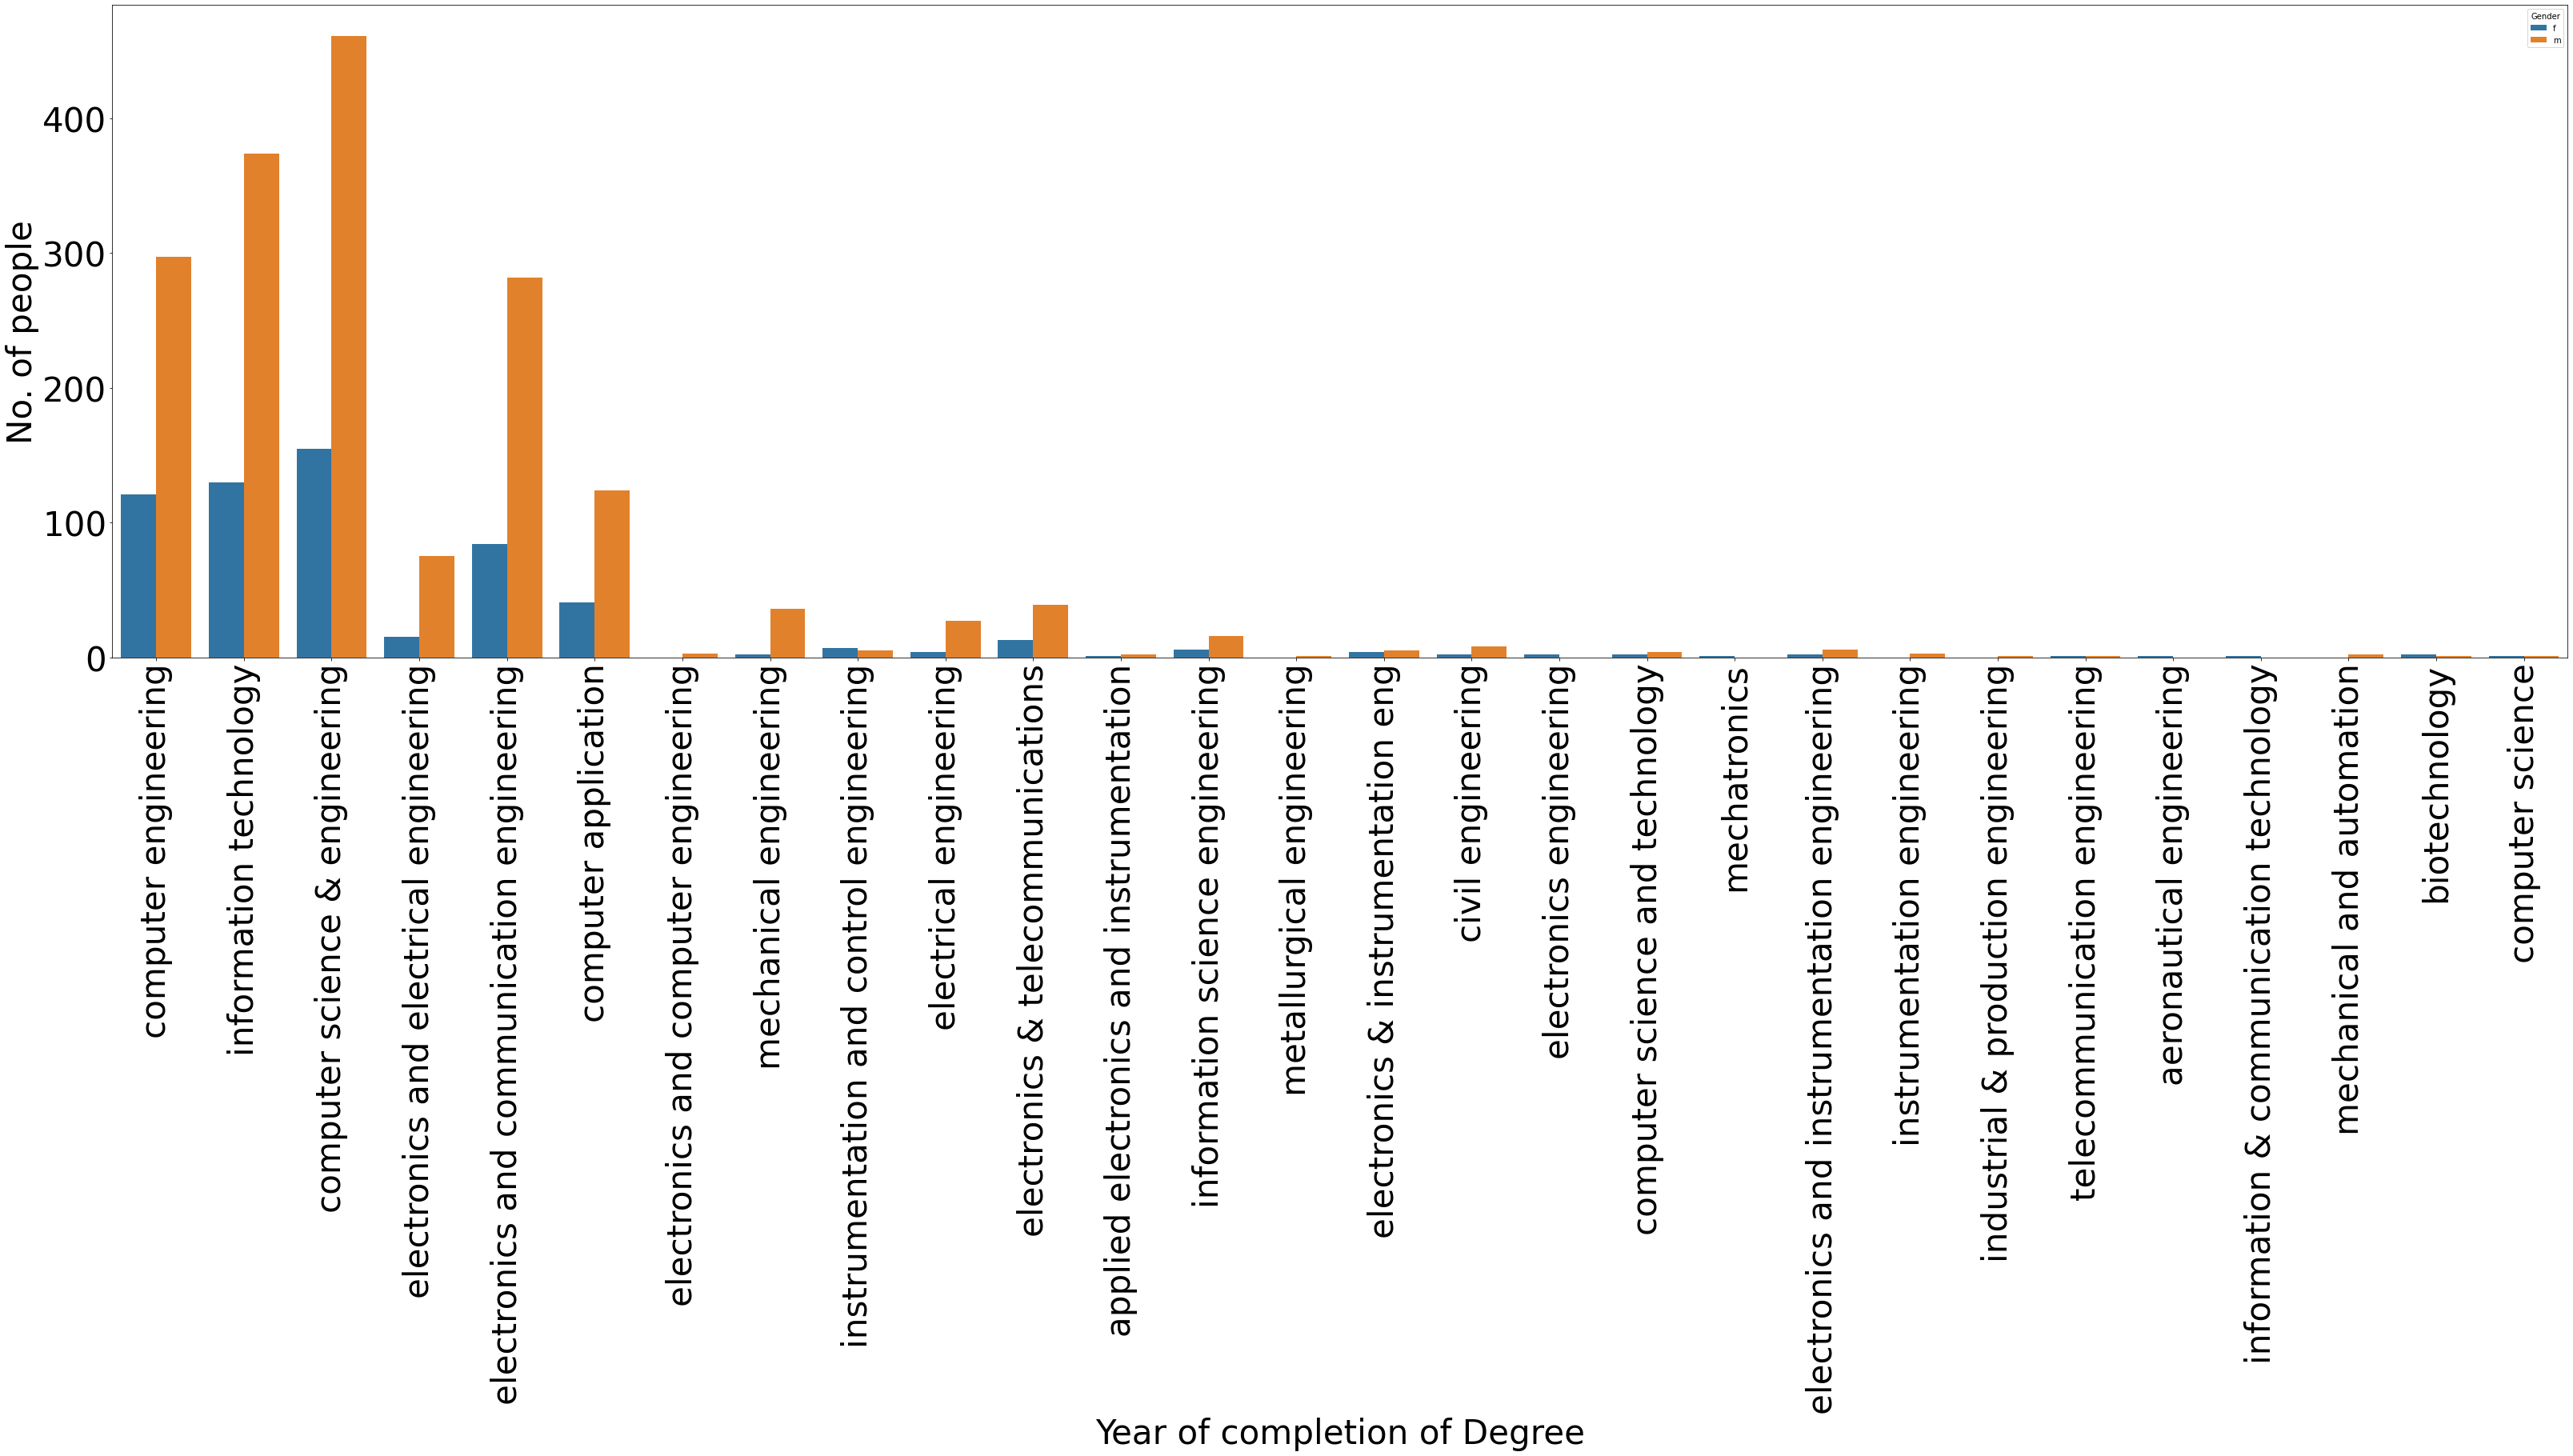

In [259]:
plt.figure(figsize=(55,15))
sns.countplot(x="Specialization",data=data,hue="Gender")
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.xlabel('Year of completion of Degree',fontsize=42)
plt.ylabel('No. of people',fontsize=42);

#### `above redundancy should be corrected`

In [260]:
data['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'icse', 'karnataka pre university board',
       'dept of pre-university education', 'bie', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board', 'up board',
       'uttar pradesh board', 'ibe', 'board of intermediate', 'isce',
       'isc', 'pre university', 'borad of intermediate',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose',
       'board of intermediate education', 'state', 'ms board',
       'intermediate state board', 'stateboard', 'up',
       'electonincs and communication(dote)', 'karnataka pu board',
       'pu board', 'apbie', 'andhra board', 'tamilnadu stateboard',
       'west bengal council of higher secondary education',
  

### `Merge redundant values of 12board`

In [261]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','andhra pradesh state board', 'up bord',
       'intermideate']

In [262]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'n/a'
for i in replace_list_state:
    data['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    data['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    data['12board'].replace(i,'icse',inplace=True)

data['12board'].replace(0,'n/a',inplace=True)

data['12board'].unique()

array(['state', 'cbse', 'icse'], dtype=object)

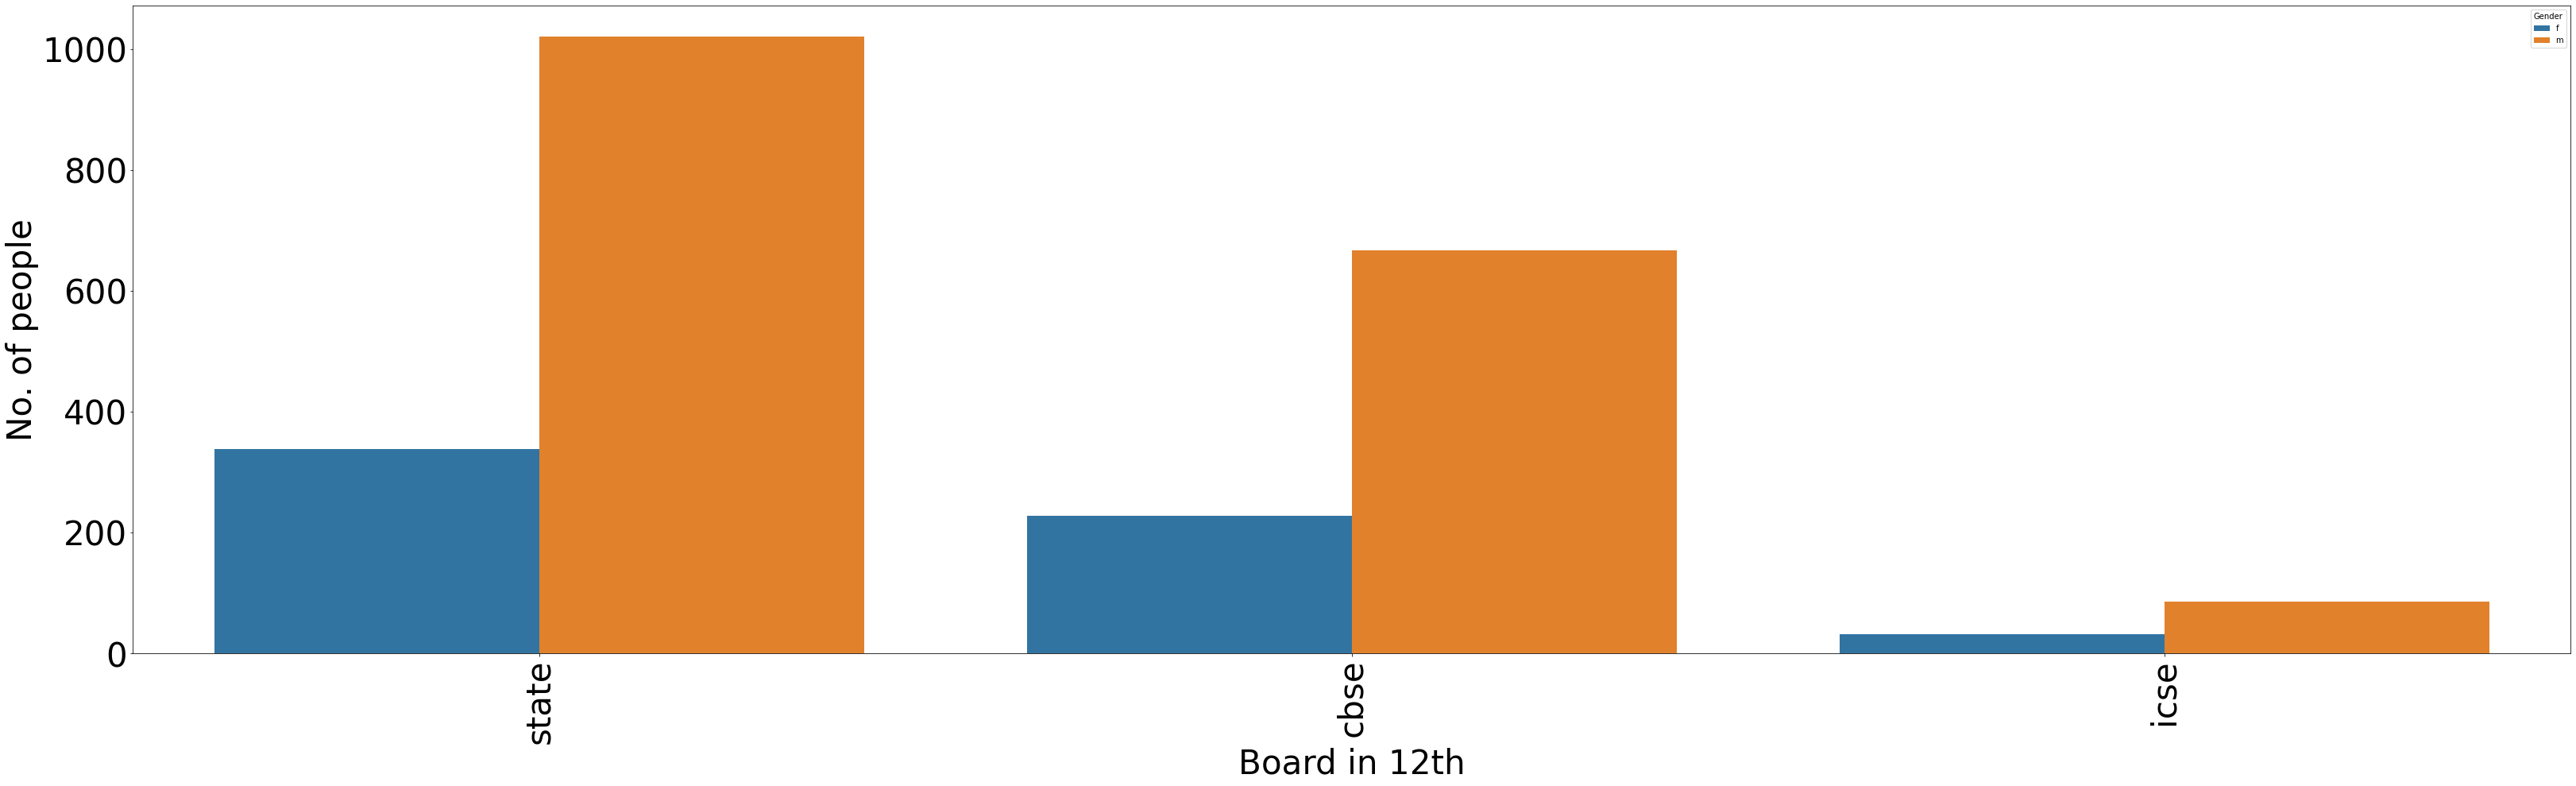

In [263]:
plt.figure(figsize=(55,15))
sns.countplot(x="12board",data=data,hue="Gender")
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.xlabel('Board in 12th',fontsize=42)
plt.ylabel('No. of people',fontsize=42);

### `Merging all Specilization to one Parent Department`

In [264]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

['CS' 'EC' 'ME' 'EL' 'other' 'CE']


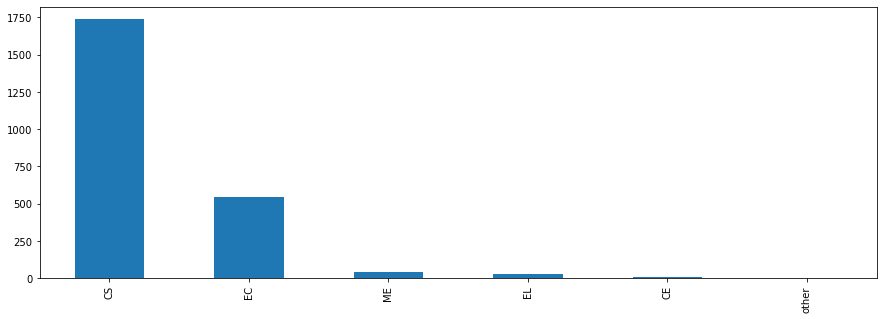

In [265]:
data['Specialization'] = data['Specialization'].map(specialization_map)

data['Specialization'].value_counts().plot(kind='bar', figsize=(15,5))

print(data['Specialization'].unique())

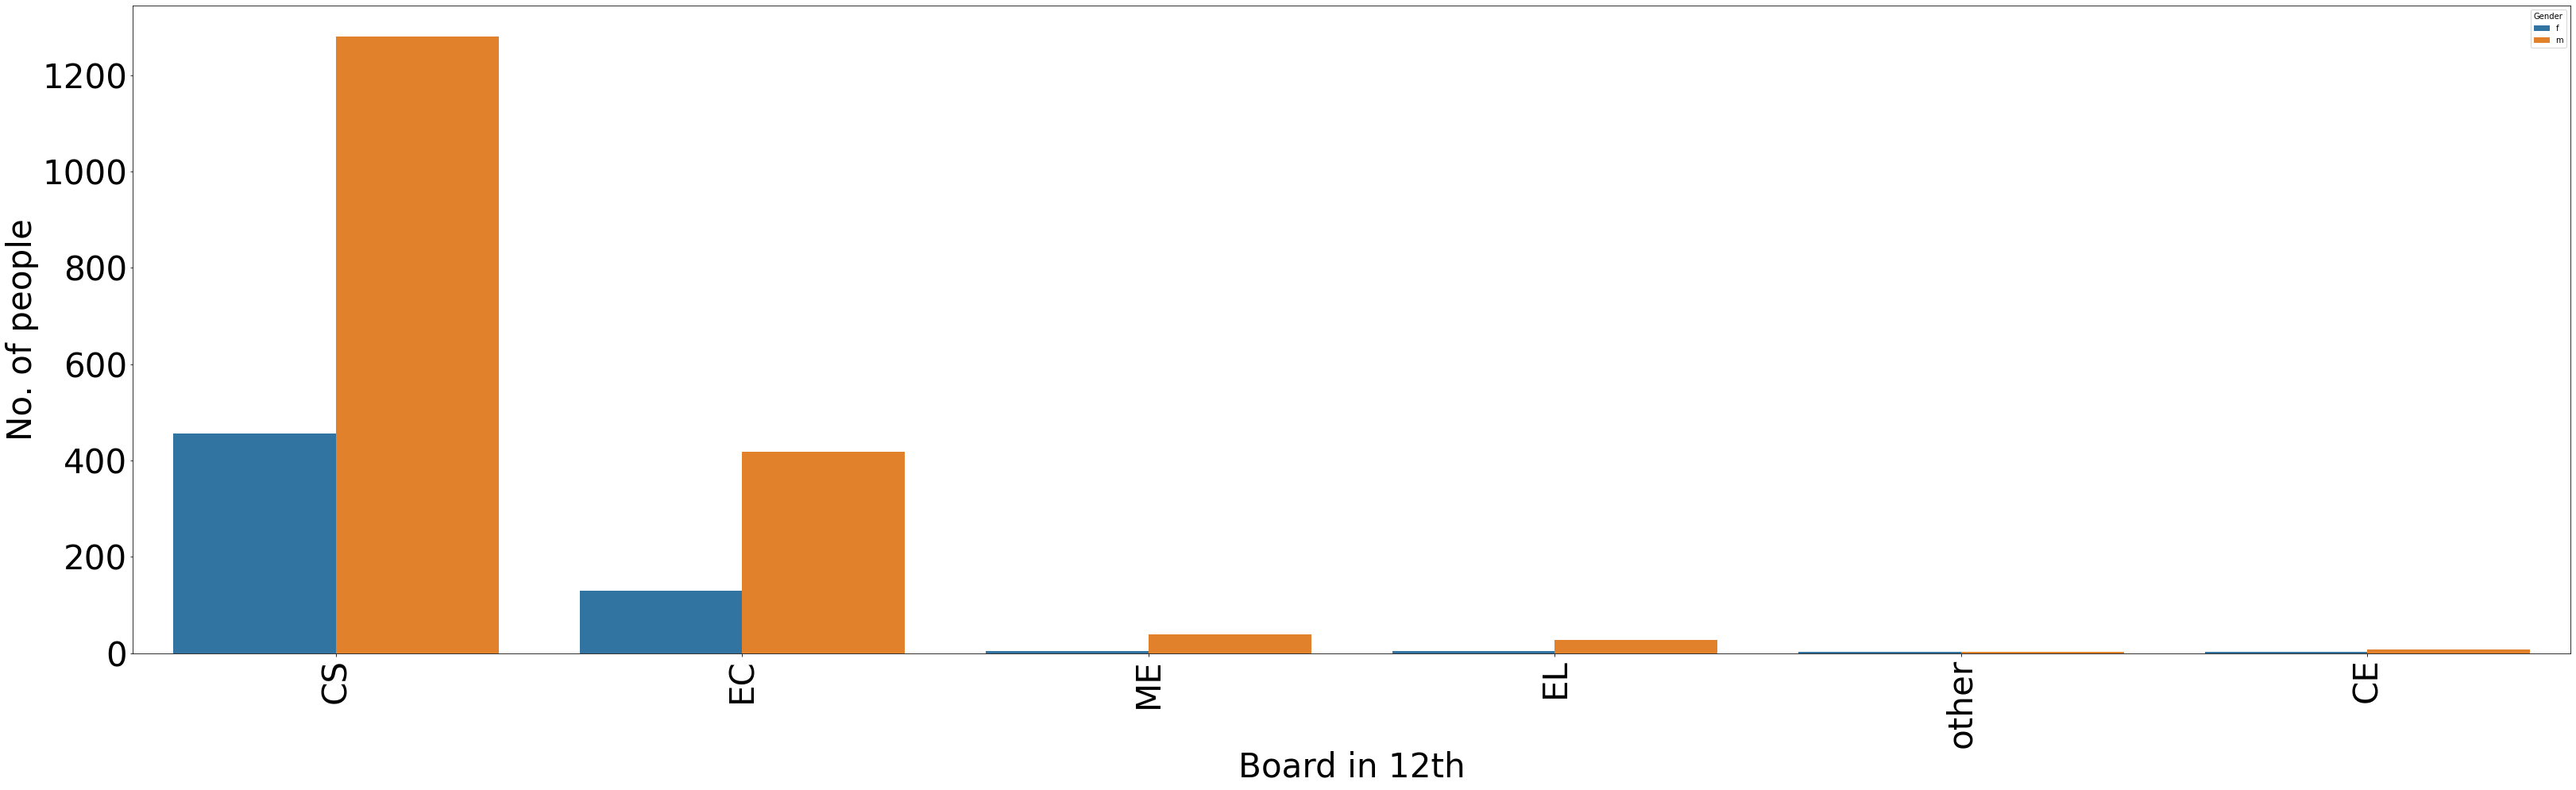

In [266]:
plt.figure(figsize=(55,15))
sns.countplot(x="Specialization",data=data,hue="Gender")
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.xlabel('Board in 12th',fontsize=42)
plt.ylabel('No. of people',fontsize=42);

## `Research Questions`

### -	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [289]:
data["Exp"]=pd.to_datetime(data["DOL"]).dt.year-pd.to_datetime(data["DOJ"]).dt.year

In [291]:
AMEO=data[(data["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (data["Exp"]<1)][["Designation","Salary","Gender","Specialization"]]
AMEO

,Designation,Salary,Gender,Specialization
734,software engineer,300000.0,m,CS
888,software engineer,110000.0,m,CS
1174,programmer analyst,505000.0,m,CS
1747,software engineer,300000.0,m,EC
2000,software engineer,315000.0,m,CS
2092,software engineer,200000.0,f,CS
2184,software engineer,100000.0,m,CS
2298,software engineer,180000.0,m,CS
2319,software engineer,140000.0,f,EC
2728,software engineer,110000.0,m,CS


In [292]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
pv=st.ttest_1samp(AMEO["Salary"],popmean=250000)[1]
if pv<0.05:
    print("We reject the null hypthesis and say that Avearge Salary for aboove fields is not 250K")
else:
    print("The avg salary for fresh grads is 250K")

The avg salary for fresh grads is 250K


### - Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

In [275]:
from scipy.stats import chi2_contingency as cst
dfsc=pd.crosstab(data["Gender"],data["Specialization"],margins=True)
pv_1=cst(dfsc)
if pv_1[1]<0.05:
    print("There is relation and gender does impact What specializations are done")
else:
    print("There is no relation and gender doesn't impacts What specializations are done")

There is no relation and gender doesnt impacts What specializations are done


-------------------------------------

#### <font color="RED" size="6" style="background-color:cornsilk;"><i><b>First claim that: After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate is True</b></i></font>

--------------------------------------

-------------------------------------------

#### <font color="RED" size="6" style="background-color:cornsilk;"><i><b>Second claim that: There is a relationship between gender and specialisation is not True</b></i></font> 

--------------------------------------------

# `END --------------------------------------------------`